# Worldwide Governance Indicators

## Importation des librairies et des données

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
wgi = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv")
wgi

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
4,Anguilla,AIA,NaN,1.367357,0.815824,0.846231,0.355737,1.234392
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


In [3]:
wgi_qt = wgi.set_index("Code").drop(columns = "Country").dropna()
wgi_qt

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
Code,,,,,,
ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...
SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931


## CAH

In [4]:
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(wgi_qt)

In [5]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

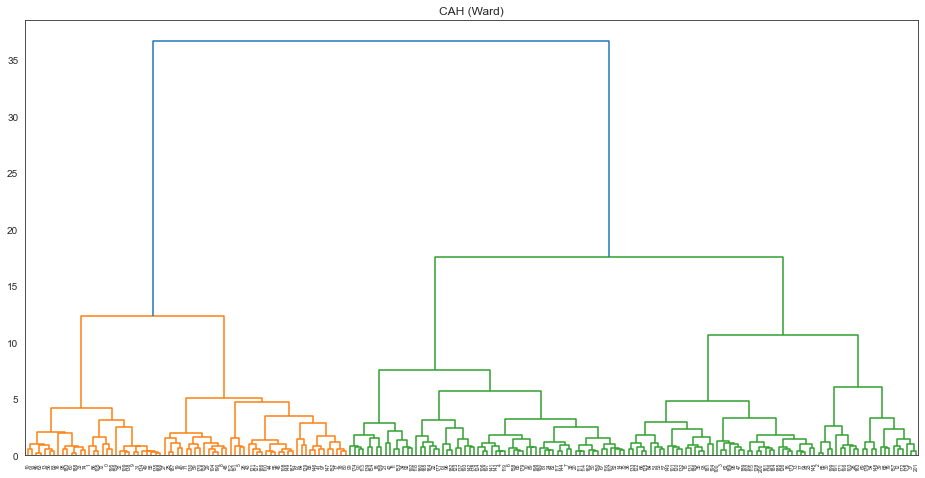

In [6]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac_complet)
plt.show()

In [7]:
hac = AgglomerativeClustering().fit(wgi_qt)

La CAH propose donc une partition en 2 classes

In [8]:
hac.n_clusters_

2

In [9]:
hac.labels_

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

## $k$-means

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(wgi_qt)
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (wgi_qt.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

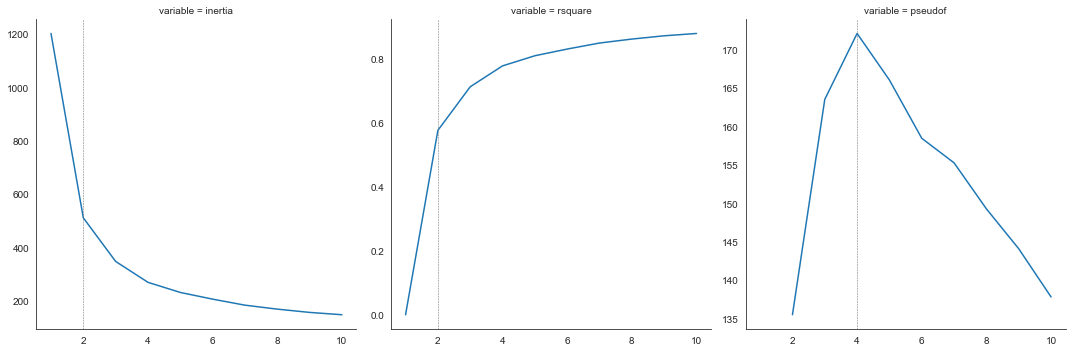

In [11]:
g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
ax1, ax2, ax3 = g.axes[0]
ax1.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax2.axvline(x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
ax3.axvline(x = 4, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

Les critères $W$ et $R^2$ propose 2 classes (voire 3), alors que le $Pseudo-F$ propose 4 classes.

In [12]:
kmeans2 = KMeans(n_clusters = 2).fit(wgi_qt)

In [13]:
kmeans4 = KMeans(n_clusters = 4).fit(wgi_qt)

## DBSCAN

Après recherche empirique, on obtient 2 classes, et 49 outliers

In [14]:
db = DBSCAN(eps = 0.8).fit(wgi_qt)
pandas.Series(db.labels_).value_counts()

 0    148
-1     49
 1      5
dtype: int64

## Comparaison des résultats

In [15]:
resultats = wgi_qt.assign(CAH = hac.labels_, 
                          kmeans2 = kmeans2.labels_, 
                          kmeans4 = kmeans4.labels_, 
                          DBSCAN = db.labels_)

In [16]:
resultats.groupby("CAH").mean().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,kmeans2,kmeans4,DBSCAN
CAH,,,,,,,,,
0,-0.50,-0.54,-0.62,-0.6,-0.63,-0.64,0.07,2.02,-0.26
1,0.85,0.82,1.01,1.0,1.03,1.02,1.00,1.53,-0.15


In [17]:
resultats.groupby("kmeans2").mean().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,kmeans4,DBSCAN
kmeans2,,,,,,,,,
0,-0.59,-0.63,-0.67,-0.64,-0.70,-0.70,0.00,2.10,-0.23
1,0.84,0.81,0.90,0.87,0.95,0.93,0.89,1.48,-0.20


In [18]:
resultats.groupby("kmeans4").mean().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,kmeans2,DBSCAN
kmeans4,,,,,,,,,
0,-1.34,-1.51,-1.45,-1.42,-1.42,-1.35,0.00,0.00,-0.50
1,0.55,0.69,0.29,0.25,0.35,0.36,0.65,0.83,-0.23
2,1.14,0.89,1.45,1.46,1.50,1.42,1.00,1.00,-0.13
3,-0.43,-0.42,-0.42,-0.40,-0.50,-0.51,0.00,0.00,-0.15


In [19]:
resultats.groupby("DBSCAN").mean().round(2)

,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,CAH,kmeans2,kmeans4
DBSCAN,,,,,,,,,
-1,-0.84,-0.53,-0.42,-0.52,-0.45,-0.41,0.22,0.33,1.18
0,0.32,0.16,0.15,0.18,0.15,0.13,0.42,0.45,2.13
1,-1.43,-1.30,-1.42,-1.30,-1.25,-1.38,0.00,0.00,0.00


### Sur l'ACP

In [20]:
pca = PCA(n_components = 2).fit(wgi_qt)

In [21]:
df_pca = pandas.DataFrame(pca.transform(wgi_qt), columns = ["Dim1", "Dim2"]) \
    .assign(CAH = hac.labels_, kmeans2 = kmeans2.labels_, kmeans4 = kmeans4.labels_, DBSCAN = db.labels_)

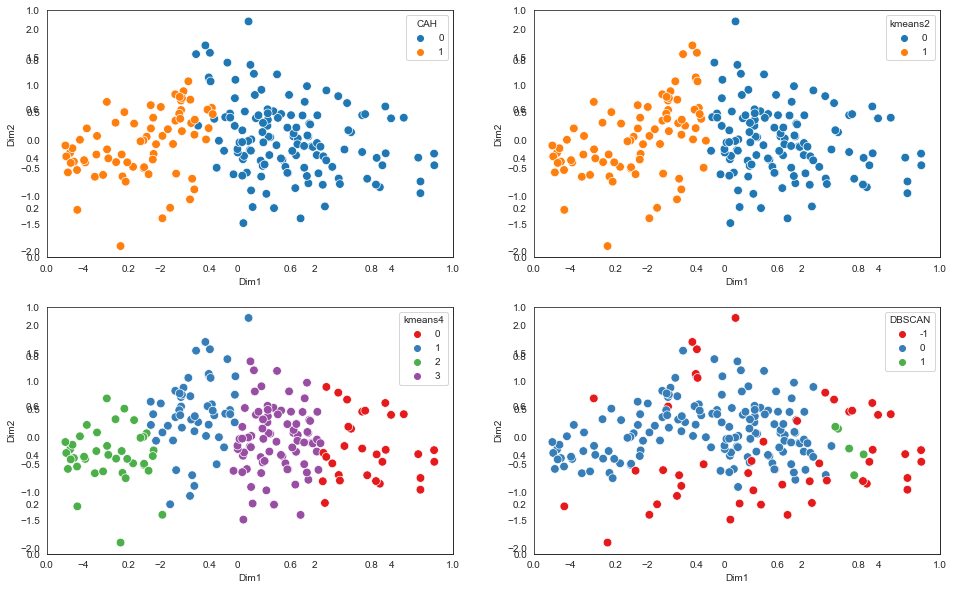

In [22]:
fig, axs= plt.subplots(2, 2, figsize=(16, 10))
ax1 = fig.add_subplot(2, 2, 1)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "CAH", data = df_pca, s = 75)
ax1 = fig.add_subplot(2, 2, 2)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "kmeans2", data = df_pca, s = 75)
ax1 = fig.add_subplot(2, 2, 3)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "kmeans4", data = df_pca, palette = "Set1", s = 75)
ax1 = fig.add_subplot(2, 2, 4)
seaborn.scatterplot(x = "Dim1", y = "Dim2", hue = "DBSCAN", data = df_pca, palette = "Set1", s = 75)
plt.show()